In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
plik_rsel = pd.read_csv('rsel.csv')
plik_cel = pd.read_csv('cel.csv')
plik_cel_rs = pd.read_csv('cel-rs.csv')
plik_2cel = pd.read_csv('2cel.csv')
plik_2cel_rs = pd.read_csv('2cel-rs.csv')

files = [ plik_rsel, plik_cel, plik_cel_rs, plik_2cel, plik_2cel_rs ]
labels = [ "1-Evol-RS", "1-Coev", "1-Coev-RS", "2-Coev", "2-Coev-RS"]

In [91]:
def count_avg(source):
    source_transp = source.transpose()
    return np.mean(source_transp[2:], axis=0)

In [105]:
def draw_plot(source, label):
    plt.plot(source['effort']/1000, count_avg(source)*100, label=label)
    plt.legend()

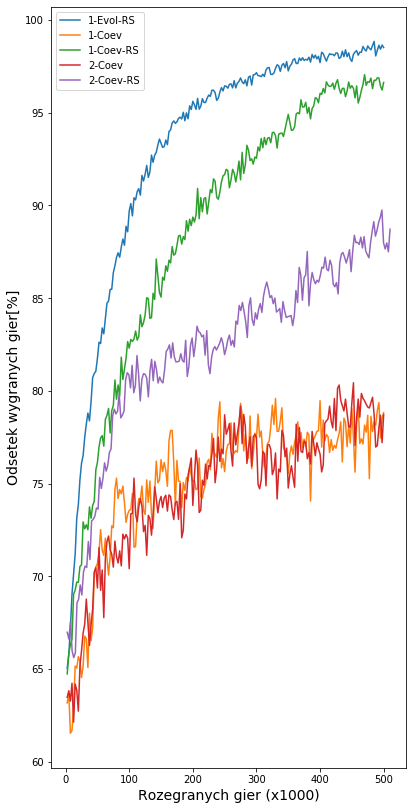

In [106]:
plt.figure(figsize=(14,14))
plt.subplot(121)
plt.xlabel("Rozegranych gier (x1000)", fontsize=14)
plt.ylabel("Odsetek wygranych gier[%]", fontsize=14)
for file, label in zip(files, labels):
    draw_plot(file, label)

In [191]:
def draw_plot2(source):
    #medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
    meanpointprops = dict(marker='o', markeredgecolor='black', markerfacecolor='firebrick')
    plt.boxplot(source, sym=' ', showmeans=True, meanprops=meanpointprops, labels=labels)

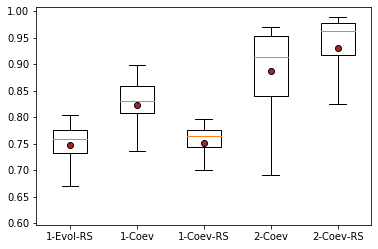

In [192]:
a = count_avg(plik_2cel)
b = count_avg(plik_2cel_rs)
c = count_avg(plik_cel)
d = count_avg(plik_cel_rs)
e = count_avg(plik_rsel)


draw_plot2([a,b,c,d,e])

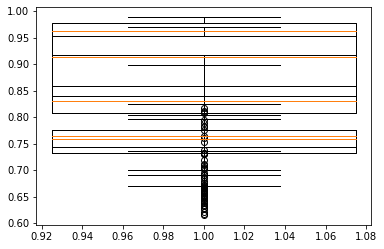

In [127]:
for file in files:
    draw_plot2(file)

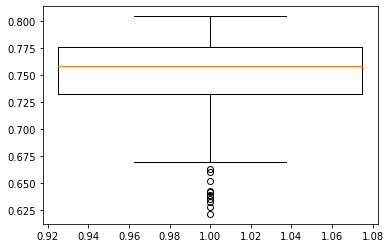